In [2]:
import pandas as pd
import numpy as np

In [18]:
# Load features from the CNN model
train_feat_max = pd.read_csv('/project/DSone/as3ek/data/seem_train_2048_features_max.csv')
valid_feat_max = pd.read_csv('/project/DSone/as3ek/data/seem_valid_2048_features_max.csv')

In [36]:
# Load RNA Seq Data
rna_seq = pd.read_csv('/project/DSone/as3ek/data/transcriptome_merged.csv')

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13468,13469,13470) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
# Drop unnecessary columns
rna_seq = rna_seq.drop(['Gene', 'PID', 'RNASes_Bx_loc', 'SEEM ID', 'Bx Date', 'Accession #'], axis=1)

In [40]:
# Load cleaned EE RNA Seq Data
ee_rna_seq = pd.read_csv('/project/DSone/as3ek/data/ee_trascript.csv')
ee_rna_seq = ee_rna_seq.drop(['Unnamed: 0'], axis=1)

In [48]:
# Filter all data to get only normal RNA Seq data
normal_rna_seq = rna_seq[rna_seq['Diagnosis'] == 'CONTROL'].reset_index(drop=True)

In [49]:
ee_rna_seq.head()

,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,AAGAB,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,FileNames
0,2.938328,19.990509,83.735050,2.656216,3.404470,17.141710,11.889671,57.604313,2.052005,22.352093,...,7.167301,6.760921,23.934557,1.351300,5.770310,2.624760,32.301320,16.912931,10.427124,SEEM_1
1,4.698266,15.687117,92.621060,1.957990,0.306087,12.404878,9.844436,84.911210,1.641775,21.663334,...,7.521921,6.561717,18.160603,1.151140,6.536171,3.283770,34.461420,14.909936,13.230409,SEEM_3
2,3.455630,13.785192,107.816505,3.281972,0.010000,13.406025,8.643127,49.870205,2.645186,18.025269,...,4.720486,4.125326,13.924426,0.878572,4.932373,2.385005,29.004587,15.764729,6.827882,SEEM_4
3,2.466141,36.609490,135.728450,3.121654,0.293090,17.032896,12.018597,91.219810,3.087415,23.395113,...,8.026385,7.405385,14.101945,2.055490,7.218950,4.769273,30.454320,25.666950,14.545485,SEEM_5
4,3.249304,30.674992,115.543710,2.711289,1.881430,19.385916,11.410261,96.130104,1.817835,18.924387,...,6.723240,6.889716,18.950125,1.843850,7.449580,3.398000,22.919546,26.630081,12.240758,SEEM_6


In [50]:
normal_rna_seq.head()

,Diagnosis,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,FileNames
0,CONTROL,1.527489,39.161606,141.393680,2.250741,3.340980,13.393648,11.521561,190.26294,3.802879,...,7.966211,5.824094,15.380531,1.90331,6.084198,5.986877,19.513960,30.423355,13.065509,GI-17-2781A
1,CONTROL,1.836630,20.815561,70.397380,1.366245,8.056910,13.729294,11.792672,188.86170,2.597826,...,6.067741,3.992341,12.340939,1.04346,4.722662,2.653590,24.902603,14.547653,10.382214,GI-17-5415A
2,CONTROL,2.070108,30.049267,78.129480,2.200778,8.668561,14.197790,13.160649,299.86722,2.576309,...,6.487394,4.760917,12.637662,1.09973,5.131794,4.623030,23.566916,17.086746,8.982910,GI-17-5671A
3,CONTROL,2.323137,27.274525,93.843880,2.508640,1.156290,15.076123,11.050514,176.36838,1.392020,...,4.988570,2.749776,13.213606,1.35546,5.087205,2.442820,26.665813,20.346804,7.571774,GI-17-6710A
4,CONTROL,1.550304,28.912386,78.544624,2.113191,0.260323,14.713420,10.754949,272.44060,2.326984,...,7.437720,5.820460,18.061235,1.39190,5.067470,3.432585,24.128992,15.404562,10.151729,GI-17-6728A


In [58]:
# Filter features to get EE data and merge from train and valid
ee_train_feat_max = train_feat_max[train_feat_max['fname'].str.contains('SEEM')].reset_index(drop=True)
ee_valid_feat_max = valid_feat_max[valid_feat_max['fname'].str.contains('SEEM')].reset_index(drop=True)
ee_feat_max = pd.concat([ee_train_feat_max, ee_valid_feat_max])

In [61]:
# Clean the name field
ee_feat_max['fname'] = ee_feat_max['fname'].str.split('__').str[0].str.split('_').str[0] + '_' + ee_feat_max['fname'].str.split('__').str[0].str.split('_').str[1]

In [8]:
ee_feat_max_grpd = ee_feat_max.groupby('fname', as_index=False).mean()

In [9]:
rna_seq.head()

,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,AAGAB,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,FileNames
0,2.938328,19.990509,83.735050,2.656216,3.404470,17.141710,11.889671,57.604313,2.052005,22.352093,...,7.167301,6.760921,23.934557,1.351300,5.770310,2.624760,32.301320,16.912931,10.427124,SEEM_1
1,4.698266,15.687117,92.621060,1.957990,0.306087,12.404878,9.844436,84.911210,1.641775,21.663334,...,7.521921,6.561717,18.160603,1.151140,6.536171,3.283770,34.461420,14.909936,13.230409,SEEM_3
2,3.455630,13.785192,107.816505,3.281972,0.010000,13.406025,8.643127,49.870205,2.645186,18.025269,...,4.720486,4.125326,13.924426,0.878572,4.932373,2.385005,29.004587,15.764729,6.827882,SEEM_4
3,2.466141,36.609490,135.728450,3.121654,0.293090,17.032896,12.018597,91.219810,3.087415,23.395113,...,8.026385,7.405385,14.101945,2.055490,7.218950,4.769273,30.454320,25.666950,14.545485,SEEM_5
4,3.249304,30.674992,115.543710,2.711289,1.881430,19.385916,11.410261,96.130104,1.817835,18.924387,...,6.723240,6.889716,18.950125,1.843850,7.449580,3.398000,22.919546,26.630081,12.240758,SEEM_6


In [10]:
crr = pd.merge(rna_seq, ee_feat_max_grpd, left_on='FileNames', right_on='fname')

In [25]:
crr_plt = crr[cols].loc[crr.index.isin(list(ee_feat_max_grpd.columns))]

In [58]:
crr_plt

,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,AAGAB,...,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.246223,0.084052,0.020194,0.254909,-0.226045,-0.227076,-0.084538,0.201047,0.165536,0.062817,...,0.276487,-0.119702,-0.058542,-0.211669,-0.035504,0.115477,0.177415,0.334741,0.067394,-0.107781
1,-0.124611,0.153846,-0.100979,-0.362638,0.043345,-0.118272,0.086888,0.062659,-0.108160,-0.048348,...,-0.063010,-0.026563,-0.045120,-0.061009,0.112787,-0.182607,-0.060969,-0.325304,0.032547,-0.042252
2,0.005729,0.135402,-0.238371,-0.204917,-0.053441,0.030237,-0.090741,0.213520,-0.098133,-0.099790,...,-0.040040,0.067914,-0.116543,0.009460,0.121545,-0.096367,0.062187,-0.348648,-0.038128,0.131384
3,0.279747,0.122406,-0.135385,0.149109,-0.191755,-0.090382,-0.004122,0.345024,0.199732,0.029370,...,0.116646,-0.055732,-0.112352,-0.166637,0.145680,0.131179,0.242615,0.177759,0.055663,0.028222
4,-0.221495,-0.019838,0.122282,-0.233753,0.134125,-0.111092,0.078233,-0.036501,0.145215,0.046827,...,-0.060689,-0.020661,-0.006795,-0.058536,0.140505,-0.246624,-0.049226,-0.030630,-0.029928,-0.136078
5,-0.171522,-0.088772,0.162599,-0.210748,0.192537,0.145048,0.239088,0.001752,0.039973,0.113443,...,-0.274393,0.122593,0.098585,0.195388,0.157065,-0.202590,-0.088977,-0.049668,-0.086434,0.001003
6,-0.213607,-0.039758,0.216369,-0.204868,0.160662,0.037025,0.167959,-0.115305,-0.010913,0.143190,...,-0.081462,0.111428,0.079971,0.127543,0.052584,-0.158983,-0.063521,0.000816,-0.045384,-0.037823
7,0.109134,0.117899,0.242937,0.357587,-0.247453,-0.070798,0.043569,0.223144,0.145765,0.037735,...,0.114455,0.082655,0.096087,-0.023683,0.108083,0.154991,0.269111,0.268379,0.037884,0.189414
8,-0.126551,-0.100070,0.417868,0.316496,0.043468,-0.078681,0.028989,-0.184516,0.110697,-0.064679,...,-0.110336,0.016309,0.098033,0.021485,-0.086540,-0.088157,-0.072037,0.200556,-0.130550,0.016157
9,-0.143828,-0.043410,-0.079273,-0.392124,0.154322,-0.024695,-0.012766,-0.059381,-0.143953,-0.083903,...,-0.190316,0.063665,0.016708,0.102974,0.107022,-0.302023,-0.189315,-0.410519,-0.118327,-0.003982


In [68]:
crr_plt.T[np.abs(crr_plt.sum(axis=0)) > 200]

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
ABHD2,-0.032982,0.227737,0.043377,0.015282,0.246059,0.175764,0.156255,0.023527,0.057339,0.050631,...,0.203751,0.053301,-0.003049,-0.029698,0.280153,-0.024658,0.024822,0.039114,0.057868,0.139584
ABI3,0.525883,-0.354977,-0.381387,0.164064,-0.207555,-0.360390,-0.121072,0.326376,0.209373,-0.492918,...,-0.004294,-0.422650,-0.151170,0.203810,-0.446398,-0.434424,0.175482,-0.194079,0.255600,-0.381277
ACKR1,0.014358,-0.293289,-0.221708,-0.023168,-0.212475,-0.138905,-0.153991,0.108294,0.146430,-0.208280,...,-0.143702,-0.102346,-0.185775,-0.069297,-0.197000,-0.079484,0.101885,0.008857,-0.043629,-0.223247
ACO1,-0.108260,0.314810,0.123701,0.049013,0.223081,0.272701,0.268103,0.116972,0.101916,0.262137,...,0.233529,0.273925,0.116782,0.101315,0.198496,0.026542,0.099433,0.192260,0.007545,0.081162
ACP5,0.354211,-0.497910,-0.189949,0.265756,-0.231158,-0.282604,-0.149527,0.264060,0.194513,-0.479907,...,0.003051,-0.460372,-0.158757,-0.005844,-0.345499,-0.429336,0.257870,-0.041695,0.281209,-0.488154
ACP6,-0.362441,0.268766,0.147866,-0.108735,0.199511,0.365463,0.189572,-0.047514,-0.101928,0.360687,...,0.132384,0.024851,-0.007657,-0.094455,0.249404,0.245492,0.134172,0.223583,-0.134271,0.125205
ACSM1,-0.092776,0.276295,0.019108,0.055963,0.260674,0.254956,0.235720,0.253808,0.307555,0.282061,...,0.275738,-0.001143,0.051637,0.145192,0.099162,-0.071475,0.362904,0.288916,0.059614,-0.036016
ACTG2,-0.126131,-0.301365,0.172502,-0.198616,-0.181534,-0.204779,-0.247859,-0.089088,0.097038,-0.254866,...,-0.141293,-0.106545,-0.432417,-0.543209,-0.015010,-0.042457,-0.231109,-0.253834,-0.220206,-0.314190
ACTN4,-0.078861,0.231375,-0.042439,-0.039737,0.273613,0.330807,0.301755,0.117316,0.193593,0.097426,...,0.344369,0.189423,-0.060004,-0.103228,0.258403,-0.127692,0.038663,0.055294,-0.015486,-0.061433
AD000671.6,0.195030,-0.338158,-0.190386,0.140950,-0.281091,-0.181734,-0.097904,0.234870,0.167630,-0.338696,...,-0.073313,-0.053817,-0.005010,0.072375,-0.249539,-0.410430,0.107256,0.041375,0.005664,-0.424206


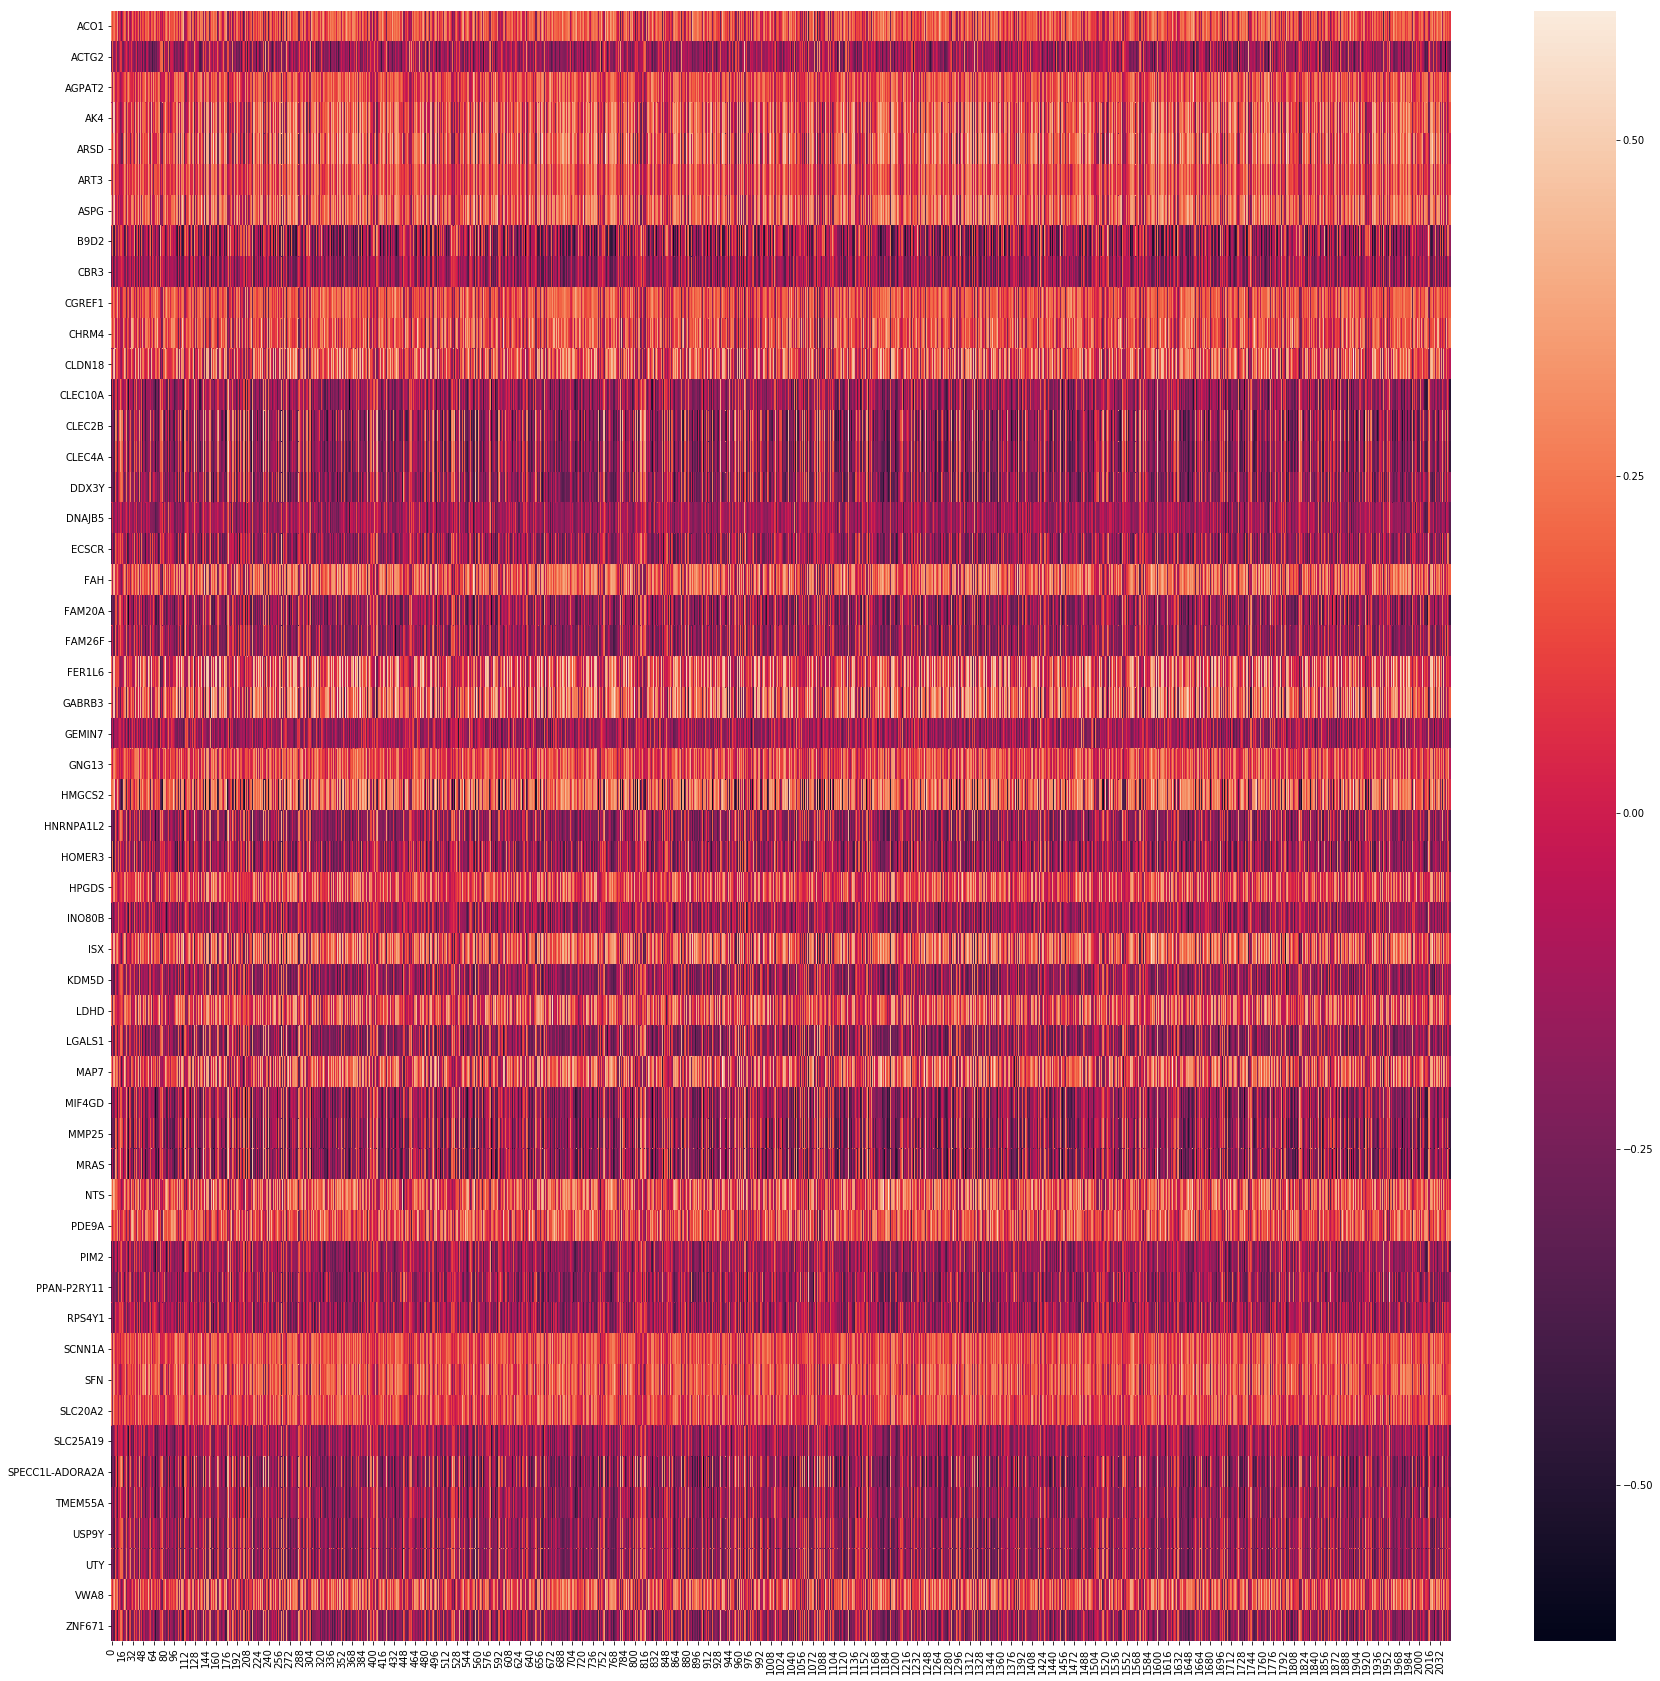

In [70]:
import seaborn as sns
%matplotlib inline

df = crr_plt.T[np.abs(crr_plt.sum(axis=0)) > 250]

plt.figure(figsize=(30, 30))

sns.heatmap(df)